In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import os
import time

tf.enable_eager_execution()
tf.__version__

/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

'1.14.0'

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.cifar100.load_data()
    

In [3]:
train_data = train_data / 255.
train_data = train_data.reshape([-1, 32, 32, 3])
train_data = train_data.astype(np.float32)
train_labels = train_labels.reshape([-1])
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape([-1, 32, 32, 3])
test_data = test_data.astype(np.float32)
test_labels = test_labels.reshape([-1])
test_labels = test_labels.astype(np.int32)

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [4]:
def one_hot_label(image, label):
  label = tf.one_hot(label, depth=100)
  return image, label

In [5]:
batch_size = 64
max_epochs = 100

# for train
N = len(train_data)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size)
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.repeat().batch(batch_size)
print(test_dataset)

<DatasetV1Adapter shapes: ((?, 32, 32, 3), (?, 100)), types: (tf.float32, tf.float32)>
<DatasetV1Adapter shapes: ((?, 32, 32, 3), (?, 100)), types: (tf.float32, tf.float32)>


label = 77


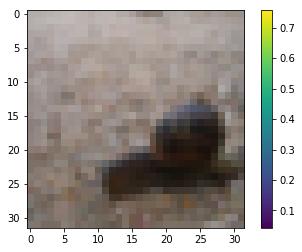

In [6]:
index = 655
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(32, 32, 3))
plt.colorbar()
#plt.gca().grid(False)
plt.show()

In [7]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

In [8]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.01023982 0.01042595 0.01066881 0.00969748 0.01083982 0.00939511
  0.00922551 0.01019561 0.01023732 0.00894139 0.00980537 0.00983313
  0.01079205 0.00971514 0.00981204 0.01019337 0.00985119 0.0097026
  0.00941103 0.01021361 0.01019571 0.01113025 0.00999423 0.01159028
  0.00990819 0.01034415 0.0099177  0.01038662 0.00922524 0.01081351
  0.0102546  0.00977539 0.01068352 0.00970056 0.01009039 0.00985655
  0.00995757 0.0104043  0.01044285 0.00923815 0.00985823 0.01036308
  0.00942042 0.01023327 0.01056833 0.00919595 0.00962806 0.00938222
  0.00993594 0.01006495 0.00941417 0.00970369 0.01000059 0.00976659
  0.01003209 0.0101     0.00973826 0.00988806 0.00973574 0.0107943
  0.01007755 0.00896968 0.01017968 0.0107873  0.00978456 0.00919968
  0.0107679  0.00984621 0.00988705 0.01018188 0.00904599 0.00995601
  0.00953546 0.00945571 0.01018466 0.00956025 0.00977886 0.01073542
  0.00963174 0.01015746 0.01008883 0.01000678 0.01097856 0.01000548
  0.00987752 0.00977479 0.01027607 0

In [9]:
model.compile(optimizer=tf.train.AdamOptimizer(1e-3),
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  4194560   
_________________________________________________________________
dense_1 (Dense)              multiple                  6

In [11]:
history = model.fit(train_dataset,
                    epochs=max_epochs,
                    steps_per_epoch=int(len(train_data) / batch_size))


W0830 10:39:13.524201 140557665097536 deprecation.py:323] From /home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
781/781 [==============================] - 11s 15ms/step - loss: 3.7031 - acc: 0.0771
Epoch 2/100
781/781 [==============================] - 11s 14ms/step - loss: 2.8986 - acc: 0.2539
Epoch 3/100
781/781 [==============================] - 11s 14ms/step - loss: 2.5125 - acc: 0.3406
Epoch 4/100
781/781 [==============================] - 11s 14ms/step - loss: 2.2413 - acc: 0.4008
Epoch 5/100
781/781 [==============================] - 11s 14ms/step - loss: 2.0098 - acc: 0.4556
Epoch 6/100
781/781 [==============================] - 11s 14ms/step - loss: 1.8042 - acc: 0.5015
Epoch 7/100
781/781 [==============================] - 11s 14ms/step - loss: 1.6231 - acc: 0.5450
Epoch 8/100
781/781 [==============================] - 11s 14ms/step - loss: 1.4352 - acc: 0.5881
Epoch 9/100
781/781 [==============================] - 11s 14ms/step - loss: 1.2633 - acc: 0.6377
Epoch 10/100
781/781 [==============================] - 11s 14ms/step - loss: 1.0999 - acc: 0.6787
Epoch 11/100
781/78

781/781 [==============================] - 11s 14ms/step - loss: 0.1402 - acc: 0.9640
Epoch 84/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1400 - acc: 0.9649
Epoch 85/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1400 - acc: 0.9690
Epoch 86/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1440 - acc: 0.9603
Epoch 87/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1297 - acc: 0.9657
Epoch 88/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1333 - acc: 0.9678
Epoch 89/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1268 - acc: 0.9682
Epoch 90/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1462 - acc: 0.9664
Epoch 91/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1381 - acc: 0.9619
Epoch 92/100
781/781 [==============================] - 11s 14ms/step - loss: 0.1470 - acc: 0.9655
Epoch 93/100
781/781 [=

In [20]:
results = model.evaluate(test_dataset, steps=int(len(train_data) / batch_size))

781/781 [==============================] - 4s 5ms/step - loss: 8.5164 - acc: 0.3294


In [19]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 8.516
accuracy value: 32.9445%


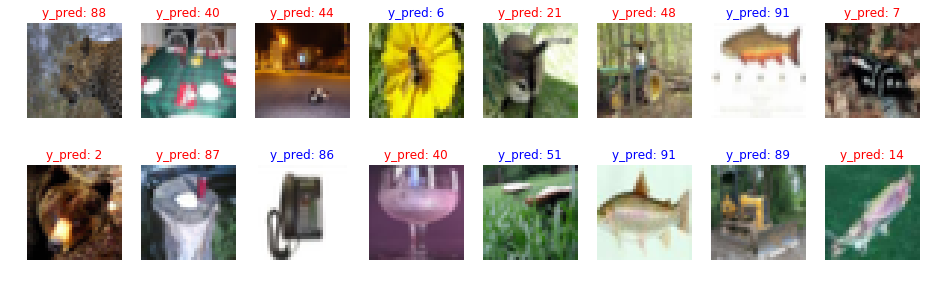

In [18]:

test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  if np.argmax(py) == batch_ys[i]:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='blue')
  else:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='red')
  p.imshow(px.reshape(32, 32, 3))
  p.axis('off')